In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("airline_passenger_satisfaction.csv")

df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


## CHECK MISSING VALUE

In [7]:
df.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

NameError: name 's' is not defined

## Get Categorical data

In [5]:
cat_df = df.select_dtypes(include=['object']).copy()
cat_df

,Gender,Customer Type,Type of Travel,Class,Satisfaction
0,Male,First-time,Business,Business,Neutral or Dissatisfied
1,Female,Returning,Business,Business,Satisfied
2,Male,Returning,Business,Business,Satisfied
3,Male,Returning,Business,Business,Satisfied
4,Female,Returning,Business,Business,Satisfied
...,...,...,...,...,...
129875,Male,Returning,Personal,Economy Plus,Neutral or Dissatisfied
129876,Male,Returning,Personal,Economy Plus,Neutral or Dissatisfied
129877,Male,Returning,Personal,Economy Plus,Neutral or Dissatisfied
129878,Male,Returning,Personal,Economy Plus,Satisfied


In [6]:
def barPlot(X,y,label):
    sns.set(style="darkgrid")
    sns.barplot(x=X,y= y,alpha=.9)
    plt.title("Freq Distribution of "+ label)
    plt.ylabel('Number of Occurances', fontsize=12)
    plt.xlabel(label, fontsize=12)
    plt.show()  


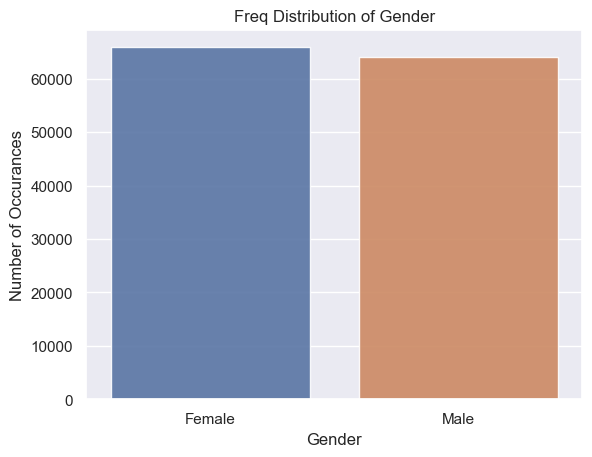

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

gender_count = cat_df["Gender"].value_counts()

barPlot(gender_count.index,gender_count.values, 'Gender')

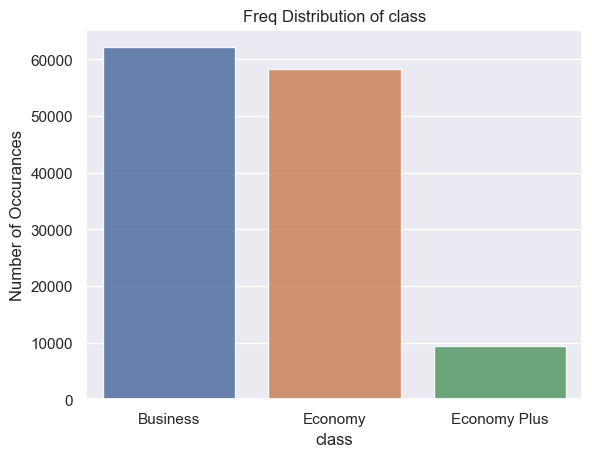

In [8]:
class_count = cat_df["Class"].value_counts()

barPlot(class_count.index,class_count.values, 'class')

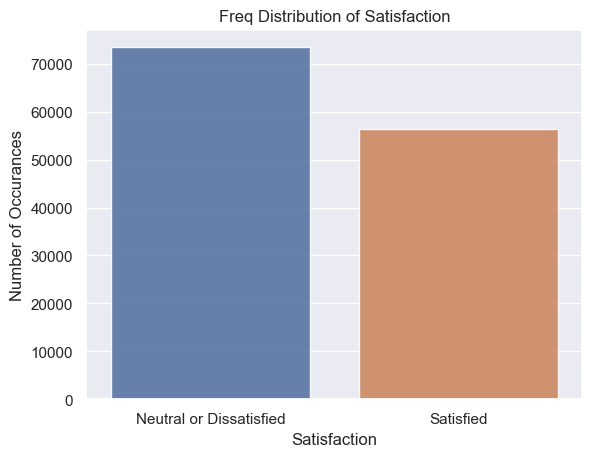

In [9]:
Satisfaction_count = cat_df["Satisfaction"].value_counts()

barPlot(Satisfaction_count.index,Satisfaction_count.values, 'Satisfaction')

In [10]:
# Get list of categorical variables
s = (cat_df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']


In [11]:
def labelMake(df, label):
    df[label+'_code'] = lb_make.fit_transform(df[label])
    return df

In [12]:
cat_df_sklearn =  cat_df.copy()

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
cat_df_sklearn = labelMake(cat_df, "Gender")
cat_df_sklearn = labelMake(cat_df, "Customer Type")
cat_df_sklearn = labelMake(cat_df, "Type of Travel")
cat_df_sklearn = labelMake(cat_df, "Class")
cat_df_sklearn = labelMake(cat_df, "Satisfaction")
cat_df_sklearn.head()

,Gender,Customer Type,Type of Travel,Class,Satisfaction,Gender_code,Customer Type_code,Type of Travel_code,Class_code,Satisfaction_code
0,Male,First-time,Business,Business,Neutral or Dissatisfied,1,0,0,0,0
1,Female,Returning,Business,Business,Satisfied,0,1,0,0,1
2,Male,Returning,Business,Business,Satisfied,1,1,0,0,1
3,Male,Returning,Business,Business,Satisfied,1,1,0,0,1
4,Female,Returning,Business,Business,Satisfied,0,1,0,0,1


In [13]:
# Select numerical columns
numerical_cols = [cname for cname in cat_df_sklearn.columns if cat_df_sklearn[cname].dtype in ['int32']]

In [14]:
cat_df_sklearn = cat_df_sklearn[numerical_cols].copy()
cat_df_sklearn

,Gender_code,Customer Type_code,Type of Travel_code,Class_code,Satisfaction_code
0,1,0,0,0,0
1,0,1,0,0,1
2,1,1,0,0,1
3,1,1,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
129875,1,1,1,2,0
129876,1,1,1,2,0
129877,1,1,1,2,0
129878,1,1,1,2,1


In [15]:
object_cols

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']

In [16]:
cat_df_sklearn

,Gender_code,Customer Type_code,Type of Travel_code,Class_code,Satisfaction_code
0,1,0,0,0,0
1,0,1,0,0,1
2,1,1,0,0,1
3,1,1,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
129875,1,1,1,2,0
129876,1,1,1,2,0
129877,1,1,1,2,0
129878,1,1,1,2,1


In [23]:
y = cat_df_sklearn.Satisfaction_code
X = df.copy()
X['Gender_code'] = cat_df_sklearn.Gender_code
X['Customer Type_code'] = cat_df_sklearn['Customer Type_code']
X['Type of Travel_code']  = cat_df_sklearn['Type of Travel_code']
X['Class_code'] = cat_df_sklearn["Class_code"]
X.drop(object_cols, axis=1, inplace=True)
X

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,...,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Gender_code,Customer Type_code,Type of Travel_code,Class_code
0,1,48,821,2,5.0,3,3,4,3,3,...,5,5,5,3,5,5,1,0,0,0
1,2,35,821,26,39.0,2,2,3,5,2,...,5,3,5,2,5,5,0,1,0,0
2,3,41,853,0,0.0,4,4,4,5,4,...,5,5,3,4,3,3,1,1,0,0
3,4,50,1905,0,0.0,2,2,3,4,2,...,4,4,5,2,5,5,1,1,0,0
4,5,49,3470,0,1.0,3,3,3,5,3,...,5,4,3,3,3,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,28,447,2,3.0,4,4,4,4,2,...,4,4,5,4,4,4,1,1,1,2
129876,129877,41,308,0,0.0,5,3,5,3,4,...,2,2,4,3,2,5,1,1,1,2
129877,129878,42,337,6,14.0,5,2,4,2,1,...,3,3,4,2,3,5,1,1,1,2
129878,129879,50,337,31,22.0,4,4,3,4,1,...,3,3,4,5,3,5,1,1,1,2


In [28]:
from sklearn.model_selection import train_test_split
# Divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=2)


In [25]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

In [29]:
#DROP MISSING VALUE
cols_with_missing = [col for col in X_train_full.columns if X_train_full[col].isnull().any()] 
X_train = X_train_full.drop(cols_with_missing, axis=1)
X_valid = X_valid_full.drop(cols_with_missing, axis=1)

#LABEL ENCODE

print("MAE from Approach 1 (Label Encoder):")
print(score_dataset(X_train, X_valid, y_train, y_valid))

MAE from Approach 1 (Label Encoder):
0.055300662149676626


In [30]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train_full))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid_full))

# Imputation removed column names; put them back
imputed_X_train.columns = X_train_full.columns
imputed_X_valid.columns = X_valid_full.columns

print("MAE from Approach 2 (Imputation):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))

MAE from Approach 2 (Imputation):
0.055094702802587


# Mutual Information